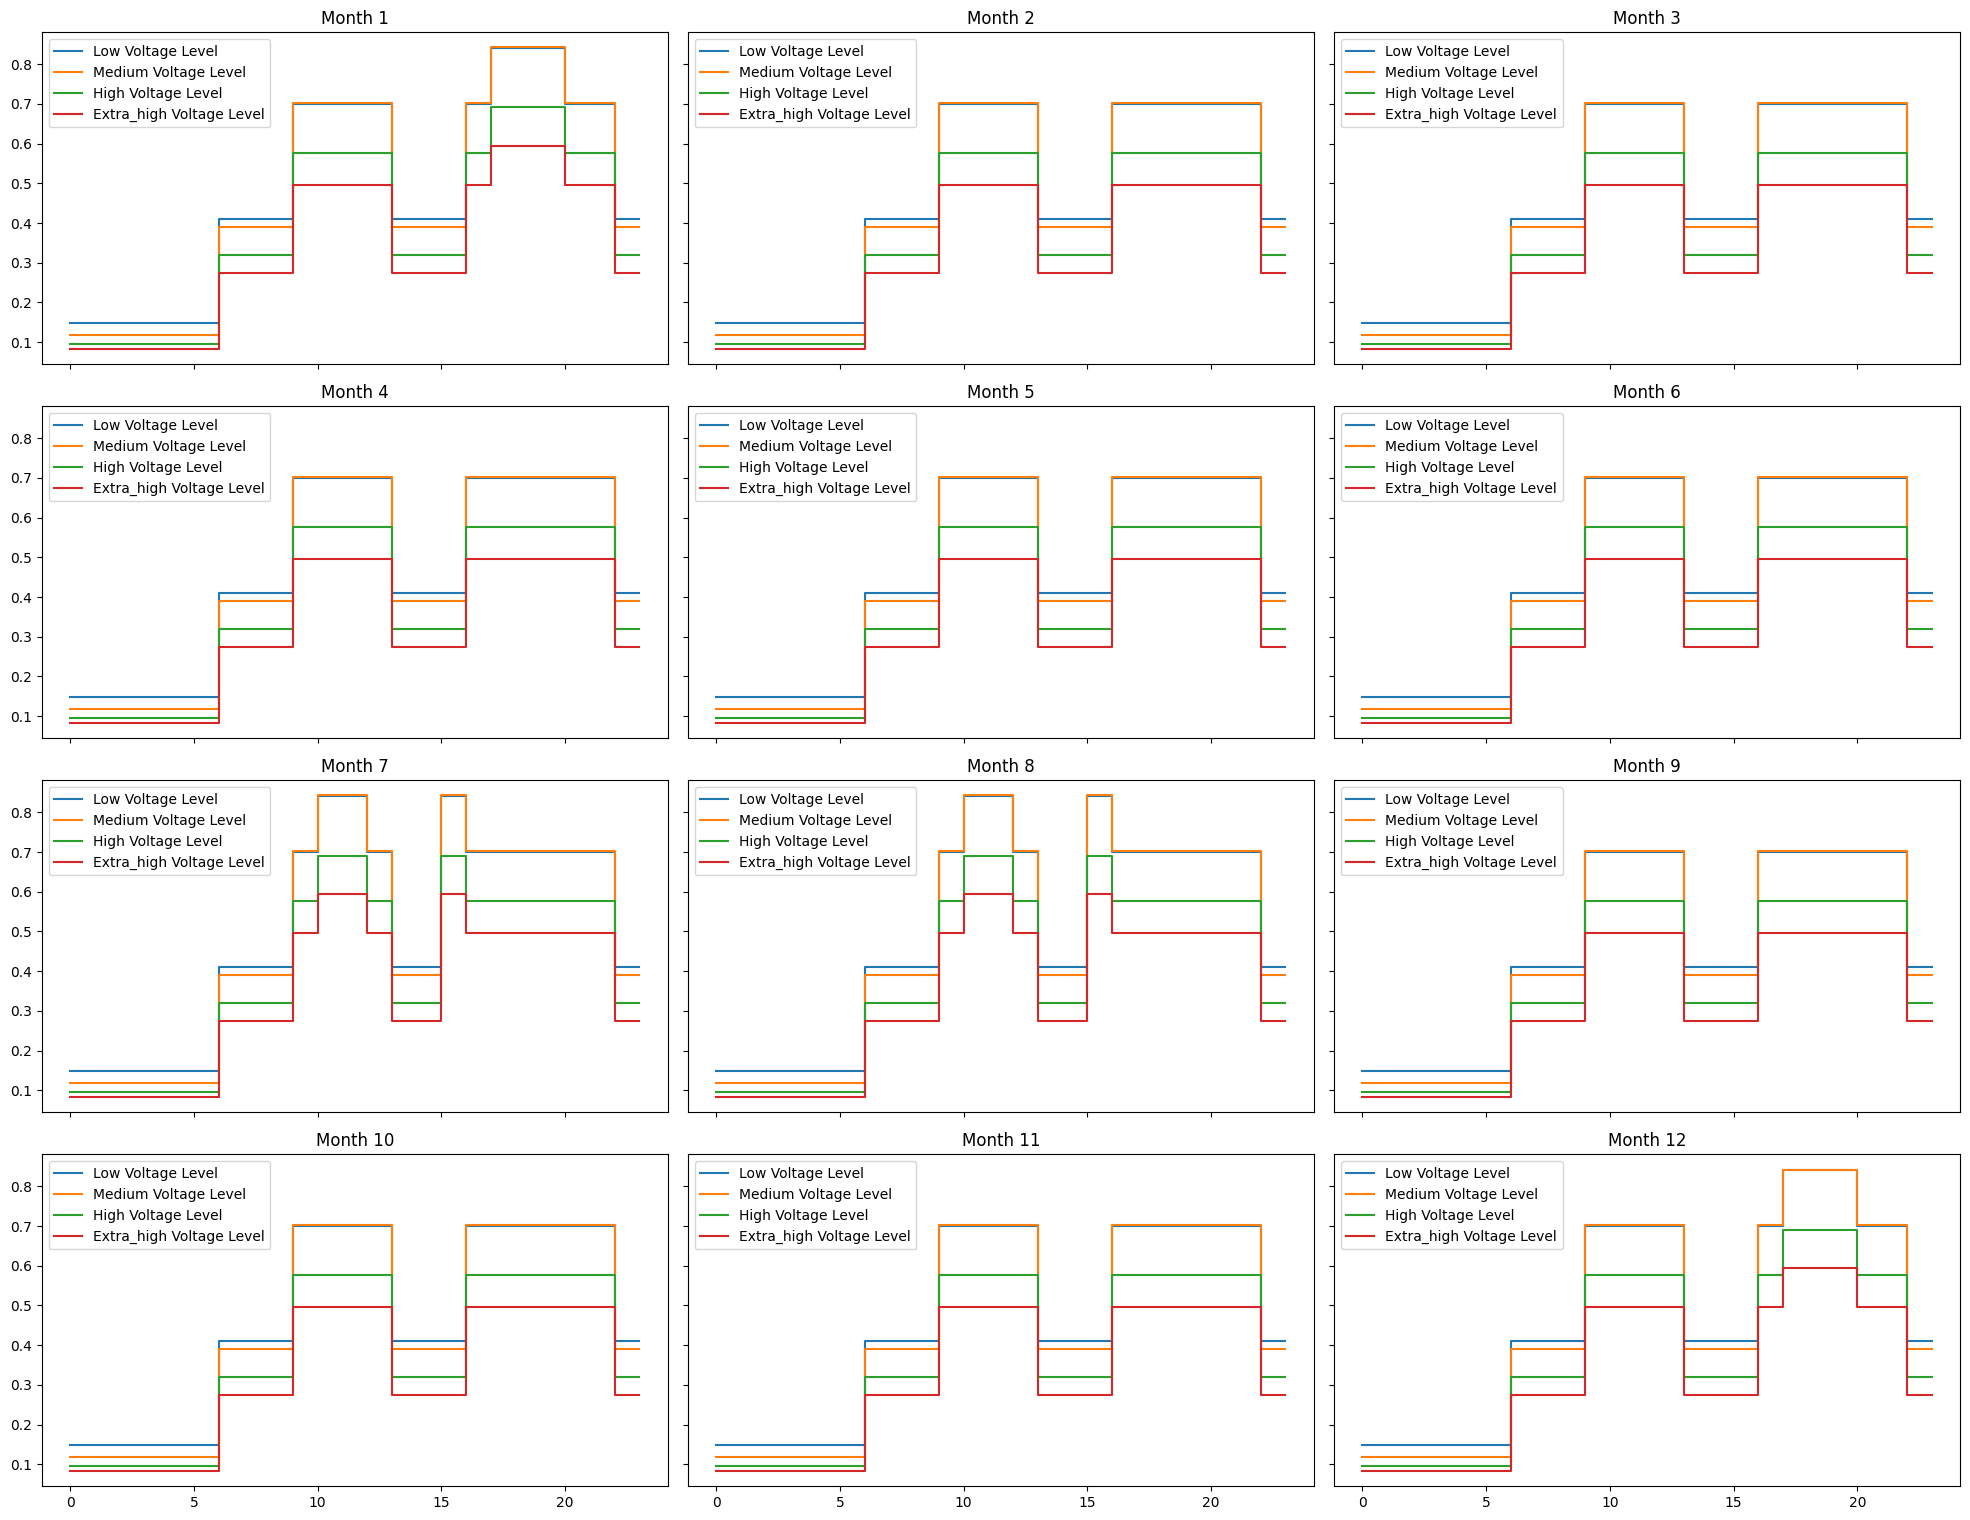

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 定义函数，返回一周每小时的电价
def time_of_use_pricing(consumption, voltage_level, month, hour):
    # 不同电压等级的基础电价和峰谷价比
    if voltage_level == 'low':
        base_price = 0.4100
        peak_price_ratio = 1.71
        off_peak_price_ratio = 0.36
    elif voltage_level == 'medium':
        base_price = 0.3900
        peak_price_ratio = 1.8
        off_peak_price_ratio = 0.3
    elif voltage_level == 'high':
        base_price = 0.3200
        peak_price_ratio = 1.8
        off_peak_price_ratio = 0.3
    elif voltage_level == 'extra_high':
        base_price = 0.2750
        peak_price_ratio = 1.8
        off_peak_price_ratio = 0.3

    # 判断是否为夏季或冬季尖峰时段
    peak_hour_conditions = (
        (month == 7 and (hour in [11, 12, 16])) or
        (month == 8 and (hour in [11, 12, 16])) or
        (month == 1 and (hour in [18, 19, 20])) or
        (month == 12 and (hour in [18, 19, 20])) 
    )

    # 根据尖峰电价上浮20%
    if peak_hour_conditions:
        return base_price * peak_price_ratio * 1.2

    # 判断时段，并根据峰谷价比调整电价
    if 10 <= hour <= 13 or 17 <= hour <= 22:
        return base_price * peak_price_ratio  # 高峰时段
    elif 7 <= hour <= 10 or 13 <= hour <= 17 or 22 <= hour <= 23:
        return base_price  # 平段时段
    else:
        return base_price * off_peak_price_ratio  # 低谷时段

# 生成一周每小时的电价数据
weeks = 1
hours_per_day = 24
total_hours = weeks * hours_per_day
x_values = np.arange(total_hours)

# 不同电压等级
voltage_levels = ['low', 'medium', 'high', 'extra_high']

# 创建12个子图
fig, axs = plt.subplots(4, 3, figsize=(22, 17), sharex=True, sharey=True)
months = range(1, 13)

# 分别绘制不同电压等级的电价阶梯曲线
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        month = months[i * 3 + j]
        ax.set_title(f'Month {month}')
        for voltage_level in voltage_levels:
            electricity_prices = [time_of_use_pricing(consumption=0, voltage_level=voltage_level, month=month, hour=hour) for hour in x_values]
            ax.step(x_values, electricity_prices, label=f'{voltage_level.capitalize()} Voltage Level')

# 显示图例
for ax in axs.flat:
    ax.label_outer()
    ax.legend()

# 调整布局
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()


呈现为全年逐时的电价数据

In [2]:
import pandas as pd

# 定义函数，返回每小时的电价
def time_of_use_pricing(consumption, voltage_level, month, hour):
    # 不同电压等级的基础电价和峰谷价比
    if voltage_level == 'low':
        base_price = 0.4100
        peak_price_ratio = 1.71
        off_peak_price_ratio = 0.36
    elif voltage_level == 'medium':
        base_price = 0.3900
        peak_price_ratio = 1.8
        off_peak_price_ratio = 0.3
    elif voltage_level == 'high':
        base_price = 0.3200
        peak_price_ratio = 1.8
        off_peak_price_ratio = 0.3
    elif voltage_level == 'extra_high':
        base_price = 0.2750
        peak_price_ratio = 1.8
        off_peak_price_ratio = 0.3

    # 判断是否为夏季或冬季尖峰时段
    peak_hour_conditions = (
        (month == 7 and (hour in [11, 12, 16])) or
        (month == 8 and (hour in [11, 12, 16])) or
        (month == 1 and (hour in [18, 19, 20])) or
        (month == 12 and (hour in [18, 19, 20])) 
    )

    # 根据尖峰电价上浮20%
    if peak_hour_conditions:
        return base_price * peak_price_ratio * 1.2

    # 判断时段，并根据峰谷价比调整电价
    if 10 <= hour <= 13 or 17 <= hour <= 22:
        return base_price * peak_price_ratio  # 高峰时段
    elif 7 <= hour <= 10 or 13 <= hour <= 17 or 22 <= hour <= 23:
        return base_price  # 平段时段
    else:
        return base_price * off_peak_price_ratio  # 低谷时段

# 创建空的DataFrame
hours_in_year = 8760
columns = ['low', 'medium', 'high', 'extra_high']
index = range(hours_in_year)
data = {col: [] for col in columns}

# 填充DataFrame
for month in range(1, 13):
    days_in_month = 31
    if month in [4, 6, 9, 11]:
        days_in_month = 30
    elif month == 2:
        days_in_month = 28  # Not a leap year
    for day in range(1, days_in_month + 1):
        for hour in range(24):
            for voltage_level in columns:
                price = time_of_use_pricing(0, voltage_level, month, hour)
                data[voltage_level].append(price)

# 创建DataFrame
df = pd.DataFrame(data)

df.to_csv("electricity_bill.csv")

计算每个社区的电压等级，匹配每个建筑的相应电费，计算社区的平均电价

In [4]:
# 计算每个社区的电压等级，匹配每个建筑的相应电费，计算社区的平均电价

import pandas as pd

# 读取 Excel 文件
building_df = pd.read_excel(r'D:\iFHHs\课题组\毕设\finalterm\energy_data\20189_ASHP\building_kV.xlsx')

# 读取 CSV 文件
df = pd.read_csv('electricity_bill.csv')

# 创建一个空的 DataFrame 用于存储结果
result_df = pd.DataFrame()

# 遍历数据并判断
for index, row in building_df.iterrows():
    building_type = row['building_type']
    height = row['height']

    # 判断函数
    def get_voltage_level_data(building_type, height):
        if any(building_type_keyword in building_type for building_type_keyword in ['etail', 'otel', 'partment']):
            if any(building_type_keyword in building_type for building_type_keyword in ['partment']):
                if height < 27:
                    voltage_level = 'low_apt'
                else:
                    voltage_level = 'medium_apt'
                # 根据电压等级选择相应列的数据
                if voltage_level == 'low_apt':
                    return df['low_apt']
                else:
                    return df['medium_apt']
            else:
                if height < 24:
                    voltage_level = 'low'
                else:
                    voltage_level = 'medium'
                # 根据电压等级选择相应列的数据
                if voltage_level == 'low':
                    return df['low']
                else:
                    return df['medium']
        else:
            voltage_level = 'medium'
            # 根据电压等级选择相应列的数据
            return df['medium']


    # 调用判断函数
    selected_column_data = get_voltage_level_data(building_type, height)

    # 将选择的列数据添加到结果 DataFrame 中
    result_df = pd.concat([result_df, selected_column_data], axis=1)


result_df['average'] = result_df.mean(axis=1)
# result_df

result_df.to_excel(r'D:\\iFHHs\\课题组\\毕设\\finalterm\\energy_data\\20189_ASHP\\price_avg.xlsx', index=False)

计算电池个数

In [70]:
sum_PV = 4373771.06
print(int((sum_PV/8760)/20)+1)

25
